In [82]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
# mediapipe to extract keypoints and values from the hand regions
import mediapipe as mp

In [83]:
# pip install opencv-python

In [84]:
# pip install tensorflow

In [85]:
# pip install scikit-learn

In [86]:
#pip install mediapipe

## Keypoints using Mediapipe holistic 

In [87]:
# mediapipe holistic for downloading and leveraging the model
mpHolistic = mp.solutions.holistic

# mediapipe drawing utilities for drawing the keypoints on the face and hands
mpDrawing = mp.solutions.drawing_utils

In [88]:
# read the image and make predictions
def mpDetection(image, model):
    
    # convert BGR image format into RGB as open-cv reads the image data in RGB, however, mediapipe detects image in RGB format
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # make the image unwritable for saving the memory consumption
    image.flags.writeable = False
    
    # make the prediction using mediapipe
    results = model.process(image)
    
    # make the image writable
    image.flags.writeable = True
    
    # again, convert the image format into original ==> RGB to BGR
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
    return image, results

In [89]:
# capture camera
cap = cv2.VideoCapture(0) 
if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

# set the mediapipe model
with mpHolistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    # loop the frames of the webcam
    while cap.isOpened():
        # read the frame/image from the webcam
        ret, frame = cap.read()

        # make the detection
        image, results = mpDetection(frame, holistic)
        # print(results)


        # check if the frame was read successfully
        if not ret:
            print("Error: Could not read frame.")
            break

        # show the window
        cv2.imshow('Hand Gesture Recognition System with LSTM', frame)

        # break the loop when 'q' key is pressed
        if cv2.waitKey(10) & 0xFF == ord('q'):
                break

# release the webcam
cap.release()

# close all OpenCV windows
cv2.destroyAllWindows()

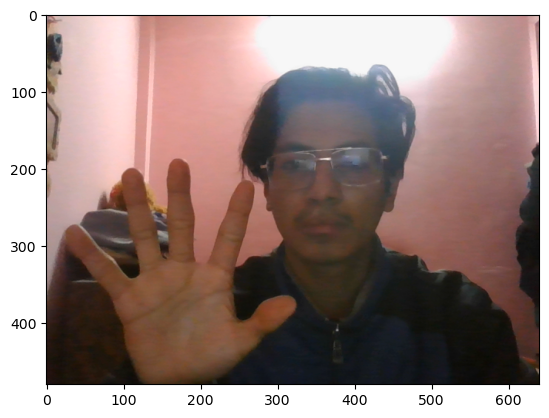

In [96]:
# visualizing the last image/frame
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))


In [91]:

print('Face landmarks number: ', len(results.face_landmarks.landmark) )  # 468

print('Pose landmarks number: ', len(results.pose_landmarks.landmark) )  # 33

print('Right landmarks number: ', len(results.right_hand_landmarks.landmark) )  # 21

# print('Left landmarks number: ', len(results.left_hand_landmarks.landmark) )  # 21



Face landmarks number:  468
Pose landmarks number:  33
Right landmarks number:  21


In [92]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [93]:
results.face_landmarks.landmark

[x: 0.557811
y: 0.55251354
z: -0.032407593
, x: 0.55698204
y: 0.49773902
z: -0.057479236
, x: 0.5585187
y: 0.5155251
z: -0.03051721
, x: 0.5504701
y: 0.44783652
z: -0.041528743
, x: 0.55716157
y: 0.4817756
z: -0.06101957
, x: 0.5582958
y: 0.46154678
z: -0.05645997
, x: 0.56186026
y: 0.4139079
z: -0.02636764
, x: 0.48819983
y: 0.41382086
z: 0.022255352
, x: 0.5634194
y: 0.37594116
z: -0.01844967
, x: 0.56384784
y: 0.35493743
z: -0.020365281
, x: 0.5664955
y: 0.2841594
z: -0.007616203
, x: 0.5577554
y: 0.5603004
z: -0.031076724
, x: 0.5579812
y: 0.5664375
z: -0.027210146
, x: 0.55851865
y: 0.5690934
z: -0.02238694
, x: 0.5584578
y: 0.57202524
z: -0.022487577
, x: 0.5582192
y: 0.578475
z: -0.024190523
, x: 0.55798066
y: 0.58679676
z: -0.026280487
, x: 0.55804354
y: 0.59563476
z: -0.024662446
, x: 0.5584965
y: 0.61063683
z: -0.013826736
, x: 0.55736524
y: 0.50623727
z: -0.052049942
, x: 0.5492557
y: 0.50591123
z: -0.036630724
, x: 0.45747226
y: 0.3585407
z: 0.077894166
, x: 0.5182926
y: 0.

In [94]:
mpHolistic.HAND_CONNECTIONS

frozenset({(0, 1),
           (0, 5),
           (0, 17),
           (1, 2),
           (2, 3),
           (3, 4),
           (5, 6),
           (5, 9),
           (6, 7),
           (7, 8),
           (9, 10),
           (9, 13),
           (10, 11),
           (11, 12),
           (13, 14),
           (13, 17),
           (14, 15),
           (15, 16),
           (17, 18),
           (18, 19),
           (19, 20)})